<a href="https://colab.research.google.com/github/ssosoo/osPark/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [ ]:
#포지션 개수 확인
df.Pos.value_counts()

,count
Pos,
SG,50
C,50


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'STL and @P in 2d plane')

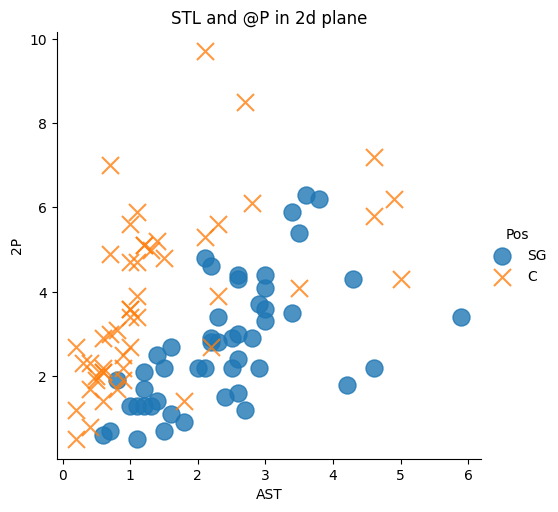

In [ ]:
#스틸, 2점 슛 데이터 시각화
sns.lmplot(x='AST', y='2P', data=df, fit_reg=False,  #x,y= 지정 필수?
           scatter_kws={"s": 150},
           markers=["o", "x"], #중괄호 x
           hue="Pos")#예측값

#타이틀
plt.title('STL and @P in 2d plane')

Text(0.5, 1.0, 'Blk and 3P in 2d plane')

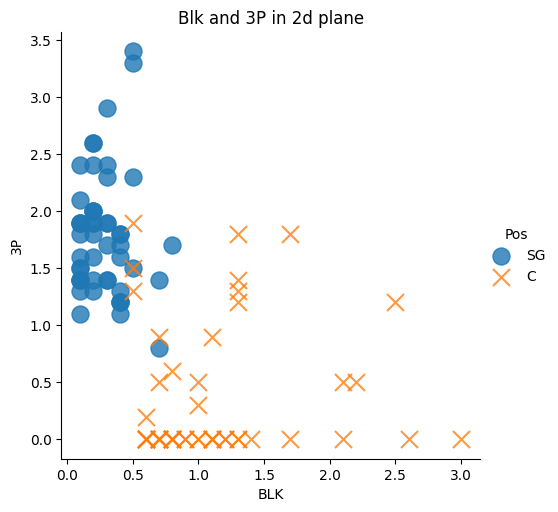

In [ ]:
# 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,
           scatter_kws={"s":150}, #좌표상 점의 크기
           markers=["o", "x"],
           hue="Pos") #pos값에 따라 데이터 색상 달라진다는 의미, 두가지이므로 마커도 두가지

plt.title('Blk and 3P in 2d plane')

In [ ]:
df.Player.value_counts()

,count
Player,
Alex Abrines,1
Ian Mahinmi,1
Victor Oladipo,1
Jamal Murray,1
Timofey Mozgov,1
...,...
Marc Gasol,1
Channing Frye,1
Evan Fournier,1


In [ ]:
#데이터 다듬기
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [ ]:
#데이터 나누기
from sklearn.model_selection import train_test_split

In [ ]:
#20%만 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

train.shape[0]
test.shape[0]

20

In [ ]:
#knn라이브러리 추가

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#교차검증을 수행할 k의 범위를 3부터 학습 데이터의 절반까지 지정
max_k_range=train.shape[0]//2 #훈련값 행의 개수의 절반
k_list = []
for i in range(3, max_k_range, 2): #최소, 최대, 보폭
  k_list.append(i) #i(홀수를 저장)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차검증(cv=10-fold)를 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                                        scoring='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.85,
 0.875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.825]

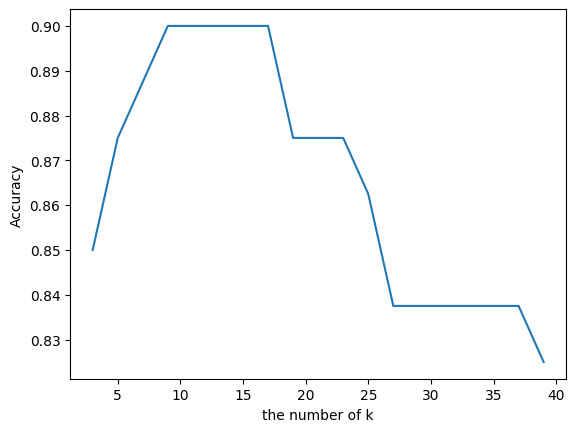

In [ ]:
#k에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#가장 높은 예측률의 k 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("the best number of k: "+str(k))

the best number of k: 9


In [ ]:
#모델 테스트

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors = k)

#학습에 사용될 속성 지정
x_train = train[['3P', 'BLK', 'TRB']]
#선수 포지션을 예측값으로 지정
y_train = train[['Pos']]

#knn 모델 학습
knn.fit(x_train, y_train.values.ravel()) #y는 1차원 배열로 저장

#테스트 데이터에서 분류를 위해 사용될 속성 지정
x_test= test[['3P', 'BLK', 'TRB']]
#테스트 데이터에서 선수 포지션에 대한 정답 지정
y_test = test[['Pos']]


#start test
pred = knn.predict(x_test) #train를 한 이유. knn에 학습값 저장돼있음.

#print accuracy
print("axxuracy: "+str(accuracy_score(y_test.values.ravel(), pred)))

axxuracy: 0.95


In [1]:
#데이터 분류를 통해 포지션이 2개로 나뉘는걸 파악, 최적의 k를 찾고 포지션 예측을 한다.
#TRB와 BLK가 2P, 3P 등 표를 사용해 유의미한 분류를 하게 하는 것들을 x_test에 넣게 찾는다.

In [2]:
!pwd

/content


In [4]:
!tree "/content/drive/MyDrive"

/bin/bash: line 1: tree: command not found
